In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('G:/Stuff/ENB2012_data.xlsx')

In [3]:
df.shape

(768, 10)

In [4]:
df.head(3)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Relative   Compactness       768 non-null    float64
 1   Surface   Area               768 non-null    float64
 2   Wall   Area                  768 non-null    float64
 3   Roof   Area                  768 non-null    float64
 4   Overall   Height             768 non-null    float64
 5   Orientation                  768 non-null    int64  
 6   Glazing   Area               768 non-null    float64
 7   Glazing Area   Distribution  768 non-null    int64  
 8   Heating   Load               768 non-null    float64
 9   Cooling Load                 768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [6]:
df.columns

Index(['Relative   Compactness', 'Surface   Area', 'Wall   Area',
       'Roof   Area', 'Overall   Height', 'Orientation', 'Glazing   Area',
       'Glazing Area   Distribution', 'Heating   Load', 'Cooling Load'],
      dtype='object')

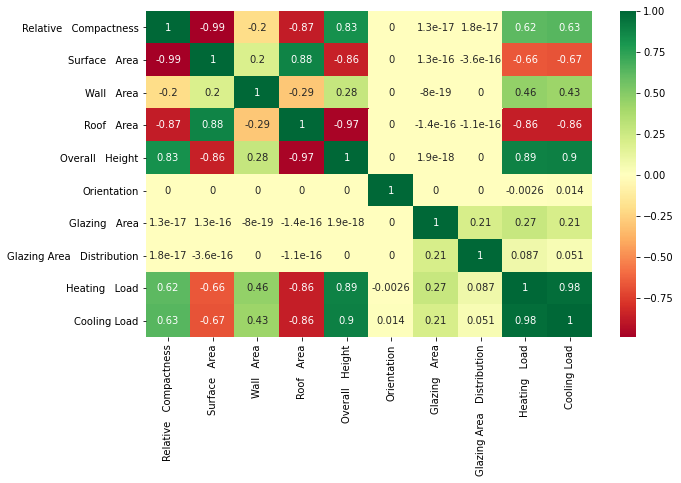

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='RdYlGn',annot=True)

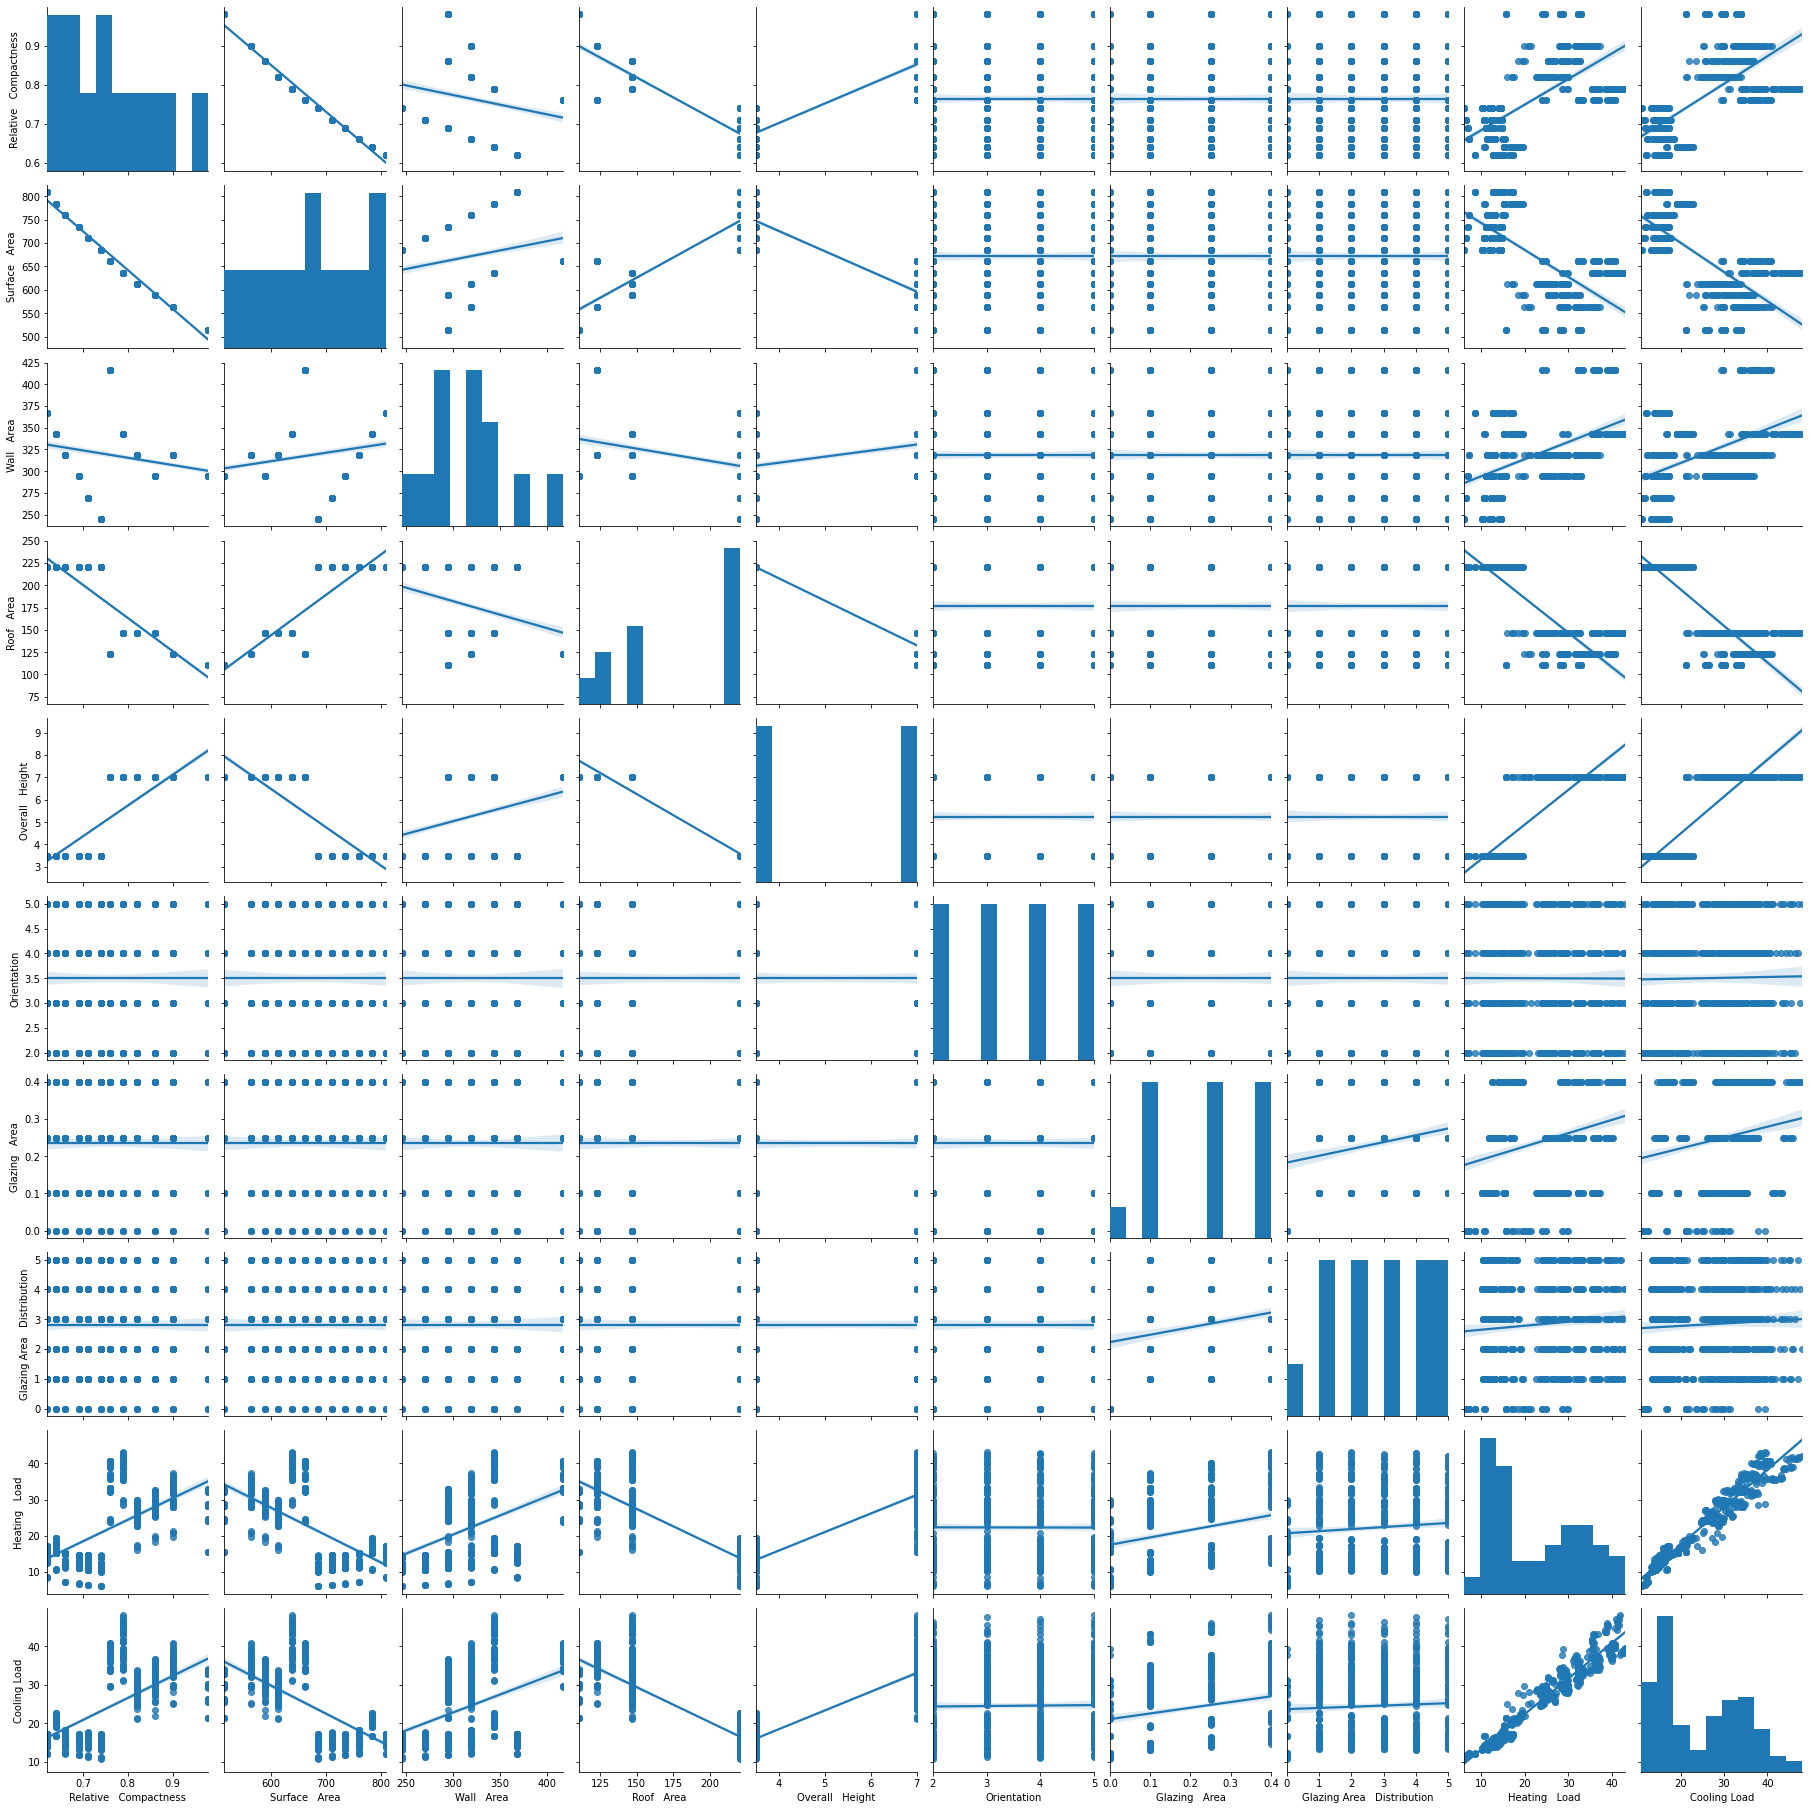

In [8]:
sns.pairplot(df,kind='reg');

In [9]:
data=df.drop(['Cooling Load','Heating   Load'],axis=1)
target=df[['Cooling Load','Heating   Load']]

In [10]:
data.shape,target.shape

((768, 8), (768, 2))

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(data,target,random_state=0,test_size=0.25)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler=MinMaxScaler()
scaler.fit(data)
x_train_scaler=scaler.transform(x_train)
x_test_scaler=scaler.transform(x_test)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [16]:
LR=LinearRegression()
LR.fit(x_train_scaler,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
KNN=KNeighborsRegressor()
KNN.fit(x_train_scaler,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [18]:
RF=RandomForestRegressor()
RF.fit(x_train_scaler,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [72]:
lasso=Lasso(alpha=0.01)
lasso.fit(x_train_scaler,y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [73]:
ridge=Ridge(alpha=0.01)
ridge.fit(x_train_scaler,y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [74]:
y_pred_LR=LR.predict(x_test_scaler)
y_pred_KNN=KNN.predict(x_test_scaler)
y_pred_RF=RF.predict(x_test_scaler)
y_pred_lasso=lasso.predict(x_test_scaler)
y_pred_ridge=ridge.predict(x_test_scaler)

### Accuracy for Test data

In [20]:
LR.score(x_test_scaler,y_test)*100

c:\software\python3.8\lib\site-packages\sklearn\base.py:426: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  warnings.warn("The default value of multioutput (not exposed in "


90.20050997518663

In [75]:
lasso.score(x_test_scaler,y_test)*100

c:\software\python3.8\lib\site-packages\sklearn\base.py:426: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  warnings.warn("The default value of multioutput (not exposed in "


89.68949023554805

In [76]:
ridge.score(x_test_scaler,y_test)*100

c:\software\python3.8\lib\site-packages\sklearn\base.py:426: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  warnings.warn("The default value of multioutput (not exposed in "


90.18018156458751

In [21]:
KNN.score(x_test_scaler,y_test)*100

c:\software\python3.8\lib\site-packages\sklearn\base.py:426: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  warnings.warn("The default value of multioutput (not exposed in "


91.05946810009067

In [22]:
RF.score(x_test_scaler,y_test)*100

c:\software\python3.8\lib\site-packages\sklearn\base.py:426: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  warnings.warn("The default value of multioutput (not exposed in "


97.843531931613

### Accuracy for Train data

In [23]:
LR.score(x_train_scaler,y_train)*100

c:\software\python3.8\lib\site-packages\sklearn\base.py:426: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  warnings.warn("The default value of multioutput (not exposed in "


90.27110203897467

In [77]:
lasso.score(x_train_scaler,y_train)*100

c:\software\python3.8\lib\site-packages\sklearn\base.py:426: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  warnings.warn("The default value of multioutput (not exposed in "


90.08289792659626

In [78]:
ridge.score(x_train_scaler,y_train)*100

c:\software\python3.8\lib\site-packages\sklearn\base.py:426: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  warnings.warn("The default value of multioutput (not exposed in "


90.2686390537603

In [24]:
KNN.score(x_train_scaler,y_train)*100

c:\software\python3.8\lib\site-packages\sklearn\base.py:426: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  warnings.warn("The default value of multioutput (not exposed in "


93.73425152050184

In [25]:
RF.score(x_train_scaler,y_train)*100

c:\software\python3.8\lib\site-packages\sklearn\base.py:426: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  warnings.warn("The default value of multioutput (not exposed in "


99.70604295222697

### Mean_squared_error

In [39]:
from sklearn.metrics import mean_squared_error

In [40]:
mean_squared_error(y_test,y_pred_LR)

9.825991650772096

In [79]:
mean_squared_error(y_test,y_pred_lasso)

10.338393386204665

In [80]:
mean_squared_error(y_test,y_pred_ridge)

9.846375037286567

### Pickle file

In [38]:
from sklearn.externals import joblib

In [27]:
joblib.dump(RF,'G:/Stuff/energy.pkl')

['G:/Stuff/energy.pkl']

In [28]:
energy_RF=joblib.load('G:/Stuff/energy.pkl')

In [29]:
energy_RF.predict([[0.7,600,300,180,3,4,1,3]])

array([[32.494 , 31.1293]])